In [26]:
import numpy as np
from scipy.spatial import Delaunay
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas

import plotting.graph_plot as gp 
 
import processing.processing_functions as pr
import graph_generation.graph_generation_func as graph

## Generate small plot

In [2]:
cells = pr.generate_artificial_spheroid(20)['cells']
spheroid = {}
spheroid['cells'] = cells

G = graph.generate_voronoi_graph(spheroid, zRatio = 1, dCells = 0.4)

In [3]:
for ind in G.nodes():
    
    G.add_node(ind, color = 'r')

In [4]:
pos =nx.get_node_attributes(G,'pos')

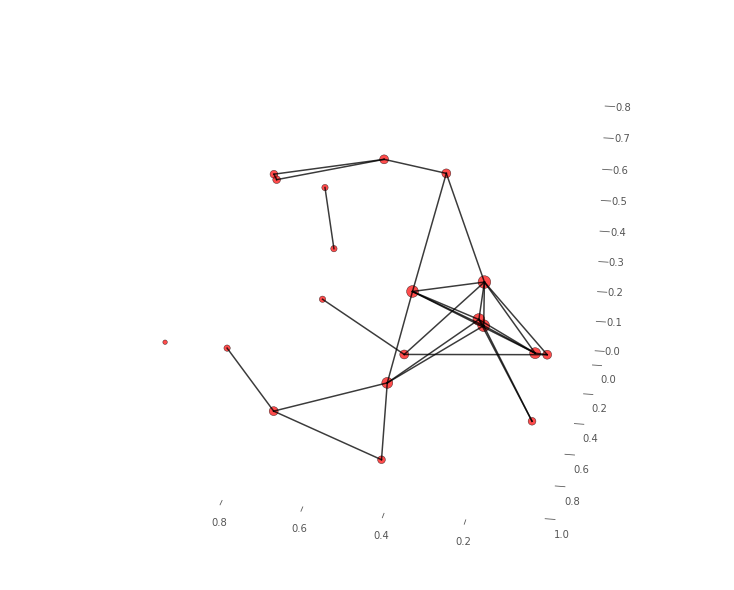

In [5]:
gp.network_plot_3D(G, 100)

## Batch analyze the data

In [6]:
import batch_analysis.batch_analyse as ba

In [43]:
spheroid_path = '/Users/gustaveronteix/Desktop/Raw Data/spheroid_frame'
intensity_path = '/Users/gustaveronteix/Desktop/Raw Data/intensity_frame'

df = ba.batch_analyse(spheroid_path,
                  intensity_path,
                  zRatio= 0.2,
                  dCells= 70,
                  Egg_grph = 1.2,
                  Egr_grph = 1,
                  Err_grph = 1.5,
                  Egg_dist = 1.2,
                  Egr_dist = 1,
                  Err_dist = 1.5)

SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)


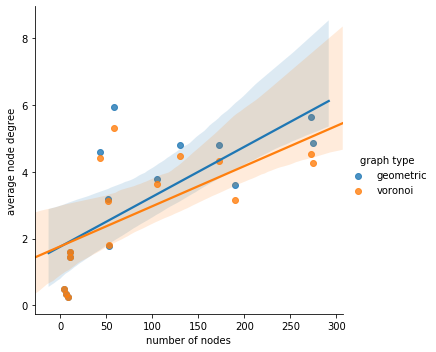

In [24]:
geometric_props = df[df['graph type'] == 'geometric']
voronoi_props = df[df['graph type'] == 'voronoi']

df['number of nodes'] = df['number of nodes'].astype(int)

import seaborn as sns

sns.lmplot(x = 'number of nodes', y = 'average node degree', hue = 'graph type', data = df)

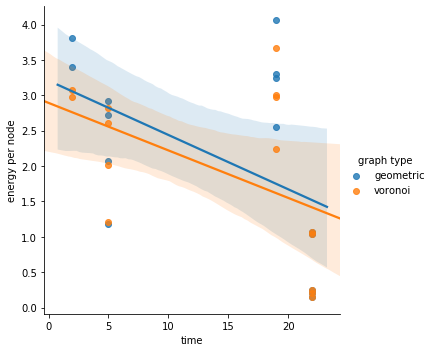

In [45]:
geometric_props = df[df['graph type'] == 'geometric']
voronoi_props = df[df['graph type'] == 'voronoi']

df['number of nodes'] = df['number of nodes'].astype(int)
df['energy per node'] = df['E_graph']/df['number of nodes']

import seaborn as sns

sns.lmplot(x = 'time', y = 'energy per node', hue = 'graph type', data = df)

In [30]:
delta_frame = pandas.DataFrame()
i = 0

for d in np.arange(10, 110, 10):
    
    df = ba.batch_analyse(spheroid_path,
                  intensity_path,
                  zRatio= 0.2,
                  dCells= d,
                  Egg_grph = 1.2,
                  Egr_grph = 1,
                  Err_grph = 1.5,
                  Egg_dist = 1.2,
                  Egr_dist = 1,
                  Err_dist = 1.5)
    
    geometric_props = df[df['graph type'] == 'geometric']
    voronoi_props = df[df['graph type'] == 'voronoi']
    
    delta_frame.loc[i, 'd'] = d
    delta_frame.loc[i, 'geometric'] = (geometric_props['number of nodes']*geometric_props['average node degree']).sum()
    delta_frame.loc[i, 'voronoi'] = (voronoi_props['number of nodes']*voronoi_props['average node degree']).sum()
    i+=1

SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_19.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame_2_2.csv
not enough values to unpack (expected 2, got 0)
SpheroidFrame

In [31]:
delta_frame['dmu'] = delta_frame['d']*0.33

delta_frame['relative difference'] = delta_frame['geometric']/delta_frame['voronoi']

Text(0, 0.5, '$N_{geo}/N_{voro}$')

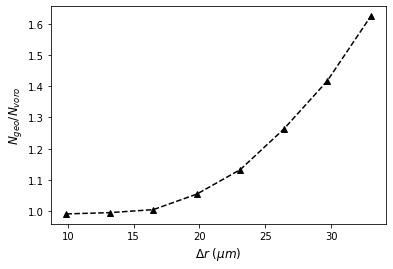

In [42]:
fig, ax = plt.subplots(figsize = (6,4))

plt.plot(delta_frame['dmu'], delta_frame['relative difference'], 'k^--')

ax.set_xlabel('$\Delta r$ ($\mu m$)', fontsize = 12)
ax.set_ylabel('$N_{geo}/N_{voro}$', fontsize = 12)